# Introduction

This notebook demonstrates how you can obtain various data from the Materials Project using pymatgen's interface to the Materials API.

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install -U pymatgen

In [ ]:
import pprint

from mp_api.client import MPRester
from pymatgen.core import Composition

# Make sure that you have the Materials API key. Put the key in the call to
# MPRester if needed, e.g, MPRester("MY_API_KEY")
mpr = MPRester()

# Getting structures with material ids

Let's say you want to find all structures with similar stoichiometry to Fe2O3.

In [ ]:
comp = Composition("Fe2O3")
anon_formula = comp.anonymized_formula
print(anon_formula)
data = mpr.summary.search(
    formula=anon_formula,
    fields=["material_id", "formula_pretty", "structure"],
)
print(len(data))  # Should show ~600 data.

A2B3


/var/folders/ql/m5k56v8n5sz5880n5sksmc9w0000gn/T/ipykernel_54455/688648806.py:4: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  data = mpr.summary.search(


Retrieving SummaryDoc documents:   0%|          | 0/1177 [00:00<?, ?it/s]

1177


In [ ]:
# data now contains a list of dict. This shows you what each dict has.
# Note that the mp id is named "task_id" in the database itself.
pprint.pprint(data[0])

MPDataDoc<SummaryDoc>(
formula_pretty='Ac2O3',
material_id=MPID(mp-11107),
structure=Structure Summary
Lattice
    abc : 4.09548748 4.09548852432923 6.29988201
 angles : 90.0 90.0 119.99999994338978
 volume : 91.51122386046316
      A : 4.09548748 -1e-08 -0.0
      B : -2.04774425 3.54679711 0.0
      C : -0.0 0.0 6.29988201
    pbc : True True True
PeriodicSite: Ac (2.048, 1.182, 4.755) [0.6667, 0.3333, 0.7548]
PeriodicSite: Ac (-2.388e-06, 2.365, 1.545) [0.3333, 0.6667, 0.2452]
PeriodicSite: O (2.048, 1.182, 2.238) [0.6667, 0.3333, 0.3553]
PeriodicSite: O (-2.388e-06, 2.365, 4.062) [0.3333, 0.6667, 0.6447]
PeriodicSite: O (0.0, 0.0, 0.0) [0.0, -0.0, 0.0],
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'task_ids', 'uncorrected_energy_per_atom', 'ene

# Getting band structures

Band structures are fairly large objects. It is not recommended that you download large quantities of bandstructures in one shot, but rather just download the ones you need.

In [ ]:
bs = mpr.get_bandstructure_by_material_id("mp-20470")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pymatgen.electronic_structure.plotter import BSPlotter

%matplotlib inline

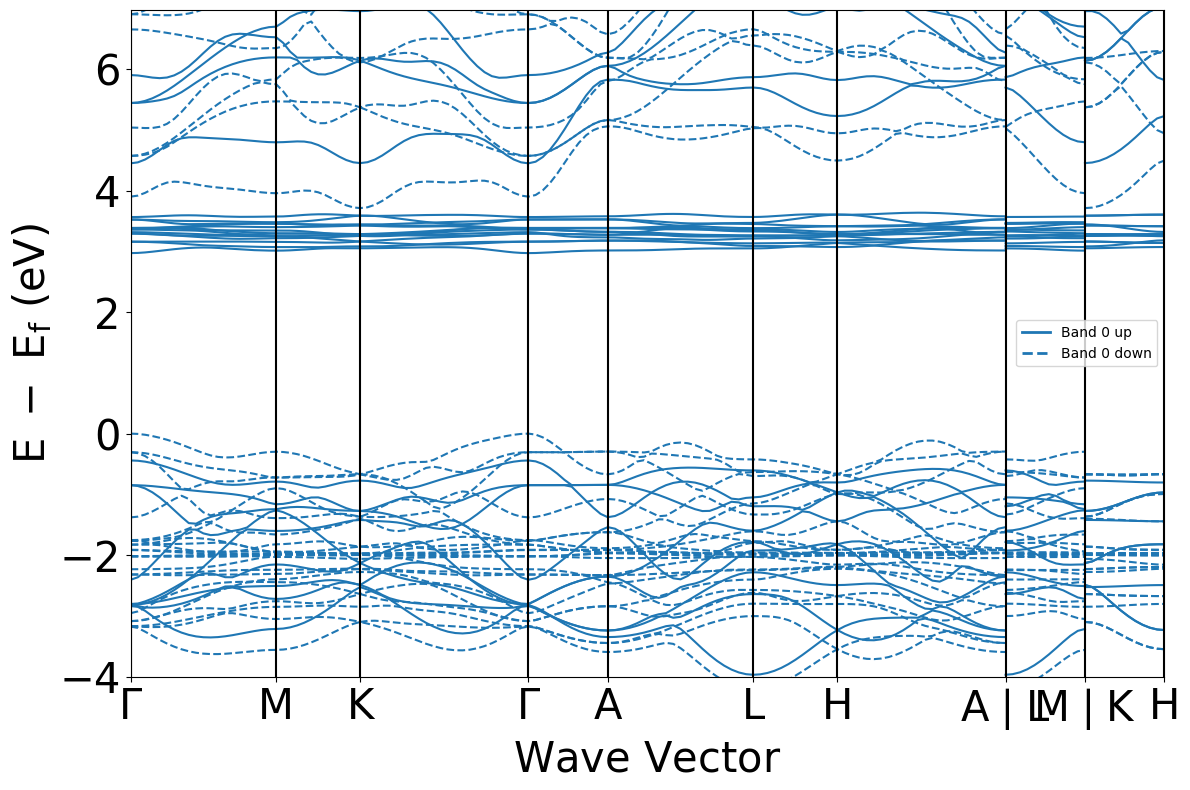

In [ ]:
plotter = BSPlotter(bs)
plotter.show()

# Getting elastic constants

We have 5000 elastic constants and growing. You can easily get all the elastic data with materials ids as follows.

In [ ]:
elastic_data = mpr.materials.elasticity.search(
    fields=["material_id", "formula_pretty", "elasticity"],
)

/var/folders/ql/m5k56v8n5sz5880n5sksmc9w0000gn/T/ipykernel_54455/1546840629.py:1: DeprecationWarning: Accessing elasticity data through MPRester.elasticity is deprecated. Please use MPRester.materials.elasticity instead.
  elastic_data = mpr.elasticity.search(


Retrieving ElasticityDoc documents:   0%|          | 0/12392 [00:00<?, ?it/s]

In [ ]:
print(len(elastic_data))
pprint.pprint(elastic_data[0])

10733
MPDataDoc<ElasticityDoc>(
formula_pretty='Si',
material_id=MPID(mp-1120447),
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'order', 'elastic_tensor', 'compliance_tensor', 'bulk_modulus', 'shear_modulus', 'sound_velocity', 'thermal_conductivity', 'young_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'debye_temperature', 'fitting_data', 'fitting_method', 'state']
)


# More resources

In general, almost any data can be obtained from MP using the MPRester, either via the high-level functions or the very powerful "query" method.

For more complex queries, you can refer to the documentation for the Materials API at https://github.com/materialsproject/mapidoc. 

# Fitting structures

Pymatgen has its own structure matching algorithm, which we have used to effectively reduce the 130,000 structures in ICSD to ~60,000 - 70,000 structures. It is fast and accurate. Here's an example of how it works.

In [ ]:
from pymatgen.analysis.structure_matcher import StructureMatcher

In [ ]:
m = (
    StructureMatcher()
)  # You can customize tolerances etc., but the defaults usually work fine.

In [ ]:
s1 = data[0].structure
print(s1)
s2 = s1.copy()
s2.apply_strain(0.1)
print(s2)

Full Formula (Ac2 O3)
Reduced Formula: Ac2O3
abc   :   4.095487   4.095489   6.299882
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (5)
  #  SP           a          b         c    magmom
---  ----  --------  ---------  --------  --------
  0  Ac    0.666667   0.333333  0.754808         0
  1  Ac    0.333333   0.666667  0.245192         0
  2  O     0.666667   0.333333  0.355296        -0
  3  O     0.333333   0.666667  0.644704        -0
  4  O     0         -0         0                0
Full Formula (Ac2 O3)
Reduced Formula: Ac2O3
abc   :   4.505036   4.505037   6.929870
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (5)
  #  SP           a          b         c    magmom
---  ----  --------  ---------  --------  --------
  0  Ac    0.666667   0.333333  0.754808         0
  1  Ac    0.333333   0.666667  0.245192         0
  2  O     0.666667   0.333333  0.355296        -0
  3  O     0.333333   0.666667  

In [ ]:
print(m.fit(s1, s2))

True


For something more challenging, let's see how many structures are similar to Gd2O3

In [ ]:
matches = []
for d in data:
    if m.fit_anonymous(d.structure, s1):
        matches.append(d)

In [ ]:
# The above fitting took a few seconds. We have 32 similar structures.
print(len(matches))

44


In [ ]:
# Let's see a few of the matches.
pprint.pprint(matches[0])
pprint.pprint(matches[1])
pprint.pprint(matches[2])

MPDataDoc<SummaryDoc>(
formula_pretty='Ac2O3',
material_id=MPID(mp-11107),
structure=Structure Summary
Lattice
    abc : 4.09548748 4.09548852432923 6.29988201
 angles : 90.0 90.0 119.99999994338978
 volume : 91.51122386046316
      A : 4.09548748 -1e-08 -0.0
      B : -2.04774425 3.54679711 0.0
      C : -0.0 0.0 6.29988201
    pbc : True True True
PeriodicSite: Ac (2.048, 1.182, 4.755) [0.6667, 0.3333, 0.7548]
PeriodicSite: Ac (-2.388e-06, 2.365, 1.545) [0.3333, 0.6667, 0.2452]
PeriodicSite: O (2.048, 1.182, 2.238) [0.6667, 0.3333, 0.3553]
PeriodicSite: O (-2.388e-06, 2.365, 4.062) [0.3333, 0.6667, 0.6447]
PeriodicSite: O (0.0, 0.0, 0.0) [0.0, -0.0, 0.0],
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'task_ids', 'uncorrected_energy_per_atom', 'ene

You can see that we have successfully found iso-structural materials!